### Load initial CSV 

In [207]:
import pandas as pd
initial_df = pd.read_csv('..//..//231203_CB_selected companies_ISR.csv',';')

In [208]:
initial_df.tail()

,Name,URL,Location,Country,Industries,Industry Group,Description,Full Description or Description,Dealership,AV terminology,Transport,Mobility,Status,Triangulation?,Layer_Member,Testing Layer
2551,Valerann,www.valerann.com/,Tel Aviv,Israel,Artificial Intelligence (AI),Artificial Intelligence (AI),Valerann empowers road network operators and c...,Valerann empowers road network operators and c...,False,False,False,False,Active,Crunchbase,NaN,NaN
2552,V-HOLA Labs,www.v-hola.com,Tel Aviv,Israel,Automotive,Hardware,VHOLA is an automotive company developing an e...,VHOLA is an automotive company developing an e...,False,False,False,False,Active,Crunchbase,NaN,NaN
2553,viisights,www.viisights.com,Tel Aviv,Israel,Artificial Intelligence (AI),Artificial Intelligence (AI),viisights is a leading innovator of behavioral...,viisights is a leading innovator of behavioral...,False,False,False,False,Active,Crunchbase,NaN,NaN
2554,Automotive Equipment (AEV),www.aev.co.il/en/,Tel Aviv,Israel,Automotive,Transportation,Automotive Equipment (AEV) is one of the early...,Automotive Equipment (AEV) is one of the early...,False,False,False,False,Active,Crunchbase,NaN,NaN
2555,Uber Eats,www.ubereats.com,San Francisco,United States,"Apps, Food Delivery, Mobile Apps","Apps, Food and Beverage, Mobile, Software, Tra...",Uber Eats is a food delivery platform that mak...,Uber Eats is a food delivery platform that mak...,Active,False,False,False,Active,Orsay,L4 ATV,NaN


### Drop unnecessary Columns

In [209]:
all_columns = initial_df.columns.unique()
unnecessary_columns = ['Industry Group', 'Description', 'Dealership', 'AV terminology','Transport ','Tesing Layer','Mobility']

In [210]:
all_columns

Index(['Name', 'URL', 'Location', 'Country', 'Industries', 'Industry Group',
       'Description', 'Full Description or Description', 'Dealership',
       'AV terminology', 'Transport ', 'Mobility', 'Status', 'Triangulation?',
       'Layer_Member', 'Testing Layer'],
      dtype='object')

In [211]:
all_columns = initial_df.columns.unique()
unnecessary_columns = ['Industry Group', 'Description', 'Dealership', 'AV terminology', 'Transport ', 'Mobility']

# Drop columns in place
initial_df.drop(labels=unnecessary_columns, axis='columns', inplace=True)

# Now, initial_df has the unnecessary columns dropped
cleaned_df = initial_df.copy(deep=True)

In [212]:
cleaned_df

,Name,URL,Location,Country,Industries,Full Description or Description,Status,Triangulation?,Layer_Member,Testing Layer
0,Lyft,lyft.com,San Francisco,United States,"Apps, Mobile Apps, Ride Sharing, Software, Tra...","Lyft designs, markets, and operates a mobile a...",Active,Own,L4 SAV,NaN
1,Uber,www.uber.com,San Francisco,United States,NaN,"Uber develops, markets, and operates a ride-sh...","Uber develops, markets, and operates a ridesha...",Orsay,L4 SAV,NaN
2,Bolt,bolt.eu,Tallinn,Estonia,"Car Sharing, Food Delivery, InsurTech, Mobile ...",Bolt is the first European super-app with a mi...,Active,Neckermann,L4 SAV,NaN
3,Ioki,ioki.com/en/,Frankfurt,Germany,"Software, Transportation",Ioki is a technology firm that provides smart ...,Active,https://research.frost.com/assets/1/f0a502e4-4...,L4 SAV,NaN
4,Bestmile,www.bestmile.com,San Francisco,United States,"Artificial Intelligence (AI), Automotive, Auto...",Bestmile is a fleet orchestration platform for...,Active,AV,L3 SAV,NaN
...,...,...,...,...,...,...,...,...,...,...
2551,Valerann,www.valerann.com/,Tel Aviv,Israel,Artificial Intelligence (AI),Valerann empowers road network operators and c...,Active,Crunchbase,NaN,NaN
2552,V-HOLA Labs,www.v-hola.com,Tel Aviv,Israel,Automotive,VHOLA is an automotive company developing an e...,Active,Crunchbase,NaN,NaN
2553,viisights,www.viisights.com,Tel Aviv,Israel,Artificial Intelligence (AI),viisights is a leading innovator of behavioral...,Active,Crunchbase,NaN,NaN
2554,Automotive Equipment (AEV),www.aev.co.il/en/,Tel Aviv,Israel,Automotive,Automotive Equipment (AEV) is one of the early...,Active,Crunchbase,NaN,NaN


In [213]:
import numpy as np
cleaned_df['Layer_Member'].fillna('', inplace=True)
cleaned_df['Testing Layer'].fillna('', inplace=True)
cleaned_df['Layer_Member'] = cleaned_df['Layer_Member'].replace('-  ', np.nan)


### Preprocess Full Description text

In [214]:
import string
import spacy
nlp = spacy.load('en_core_web_md')

def lemmatize_and_lowercase_and_punctuation(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.text not in string.punctuation and token.text not in ['vehicle','vehicles', 'car', 'cars']]
    return ' '.join(lemmatized_tokens)

cleaned_df['Description_preprocessed'] = cleaned_df['Full Description or Description'].apply(lemmatize_and_lowercase_and_punctuation)

In [216]:
cleaned_df.head(3)

,Name,URL,Location,Country,Industries,Full Description or Description,Status,Triangulation?,Layer_Member,Testing Layer,Description_preprocessed,Assigned_Topic
0,Lyft,lyft.com,San Francisco,United States,"Apps, Mobile Apps, Ride Sharing, Software, Tra...","Lyft designs, markets, and operates a mobile a...",Active,Own,L4 SAV,,lyft design market operate mobile application ...,2
1,Uber,www.uber.com,San Francisco,United States,NaN,"Uber develops, markets, and operates a ride-sh...","Uber develops, markets, and operates a ridesha...",Orsay,L4 SAV,,uber develop market operate ride share mobile ...,2
2,Bolt,bolt.eu,Tallinn,Estonia,"Car Sharing, Food Delivery, InsurTech, Mobile ...",Bolt is the first European super-app with a mi...,Active,Neckermann,L4 SAV,,bolt european super app mission city people bo...,-1


## Load models for BERTtopic

In [46]:
#conda install -c conda-forge hdbscan

In [ ]:
#pip install -U scikit-learn

In [ ]:
import hdbscan
from bertopic import BERTopic

topic_model = BERTopic(embedding_model = "all-MiniLM-L6-v2")

# Descriptive 

### Number of Layer Members in Dataset

In [217]:
cleaned_df.groupby(by='Layer_Member').count().Name

Layer_Member
          2514
L1 ATV      10
L1 SAV       7
L2 ATV       6
L2 SAV       6
L3 SAV       7
L4 ATV       2
L4 SAV       4
Name: Name, dtype: int64

### Count Companies per country

In [218]:
cleaned_df.groupby(by='Country').count().Name

Country
Albania                          1
Austria                         15
Belgium                         22
Bulgaria                         2
Canada                         162
City of                         10
Croatia                          5
Czech Republic                   9
Denmark                         10
Estonia                          8
Finland                          8
France                          86
Germany                        181
Greece                           2
Hungary                         14
Iceland                          1
Ireland                          6
Isle of Man                      1
Israel                          81
Italy                           80
Latvia                           3
Lithuania                        3
Luxembourg                       2
Norway                          13
Poland                          14
Portugal                        10
Romania                          5
Scottland                        1
Serbia      

# Create BERTtopic Clustering Output

In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP
from bertopic import BERTopic

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Assuming topic_model is already definedb

In [442]:
# Fit BERTopic model to the 'Description_preprocessed' column of copied_df
topics, probabilities = topic_model.fit_transform(cleaned_df['Description_preprocessed'])


# Add the assigned topic column to the original DataFrame
cleaned_df['Assigned_Topic'] = topics

#Instead of accessing deafult HBDSCAN model from BERTopic, make parameters explicit
hdbscan_model = HDBSCAN(min_cluster_size=25, metric='euclidean', cluster_selection_method='eom', prediction_data=True, min_sample = 10)

# Explicitly mention HDBSCAN
print(f"Clustering is performed using HDBSCAN with min_cluster_size={hdbscan_model.min_cluster_size}, "
      f"metric={hdbscan_model.metric}, cluster_selection_method={hdbscan_model.cluster_selection_method}")


# Create topic model
docs = cleaned_df["Description_preprocessed"]
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", verbose=True)
topics, _ = topic_model.fit_transform(cleaned_df['Description_preprocessed'])

# Prepare data for plotting
embeddings = topic_model._extract_embeddings(docs, method="document")
umap_model = UMAP(n_neighbors=20, n_components=2, min_dist=0.0, random_state=42, metric='cosine').fit(embeddings)
prob_df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
prob_df["topic"] = topics

# Add the assigned topic column to the original DataFrame
cleaned_df['Assigned_Topic_phase_0'] = topics

# Plot parameters
top_n = 40
fontsize = 12

# Slice data
to_plot = prob_df.copy()
to_plot[prob_df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

2023-12-04 19:59:20,491 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

2023-12-04 19:59:54,429 - BERTopic - Embedding - Completed ✓
2023-12-04 19:59:54,429 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-04 20:00:05,702 - BERTopic - Dimensionality - Completed ✓
2023-12-04 20:00:05,702 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-04 20:00:05,796 - BERTopic - Cluster - Completed ✓
2023-12-04 20:00:05,799 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-04 20:00:05,968 - BERTopic - Representation - Completed ✓
2023-12-04 20:00:06,126 - BERTopic - Embedding - Transforming documents to embeddings.


Clustering is performed using HDBSCAN with min_cluster_size=25, metric=euclidean, cluster_selection_method=eom


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

2023-12-04 20:00:50,997 - BERTopic - Embedding - Completed ✓
2023-12-04 20:00:50,997 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-04 20:01:09,915 - BERTopic - Dimensionality - Completed ✓
2023-12-04 20:01:09,917 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-04 20:01:10,081 - BERTopic - Cluster - Completed ✓
2023-12-04 20:01:10,086 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-04 20:01:10,400 - BERTopic - Representation - Completed ✓


### Show clustering Output

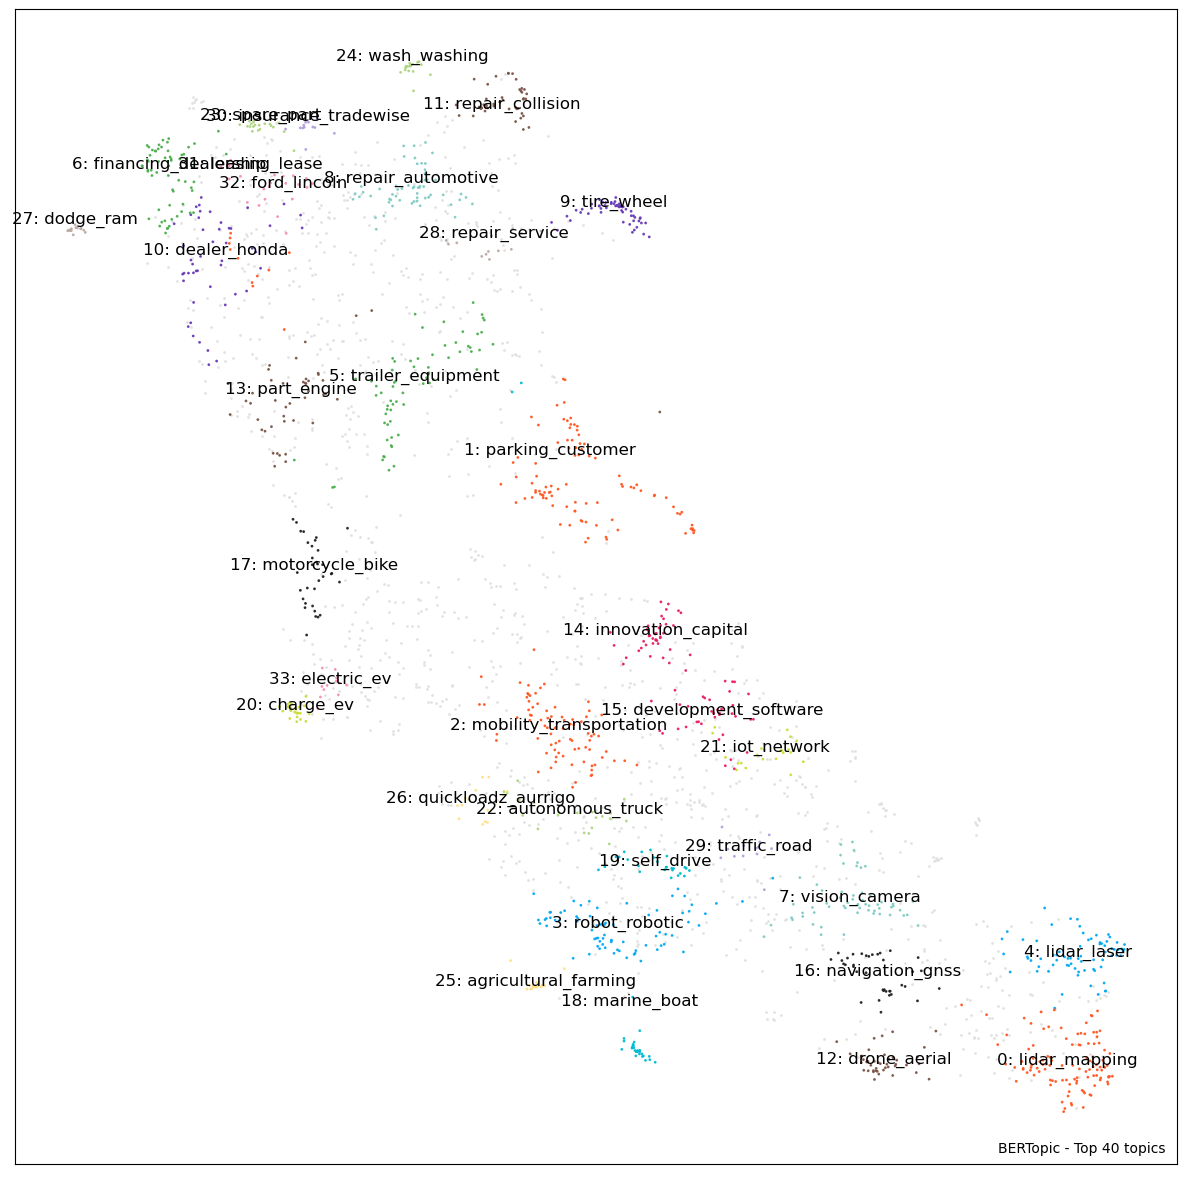

In [443]:
cmap = matplotlib.colors.ListedColormap(['#FF5722', '#03A9F4', '#4CAF50', '#80CBC4', '#673AB7', '#795548',
                                         '#E91E63', '#212121', '#00BCD4', '#CDDC39', '#AED581', '#FFE082',
                                         '#BCAAA4', '#B39DDB', '#F48FB1'])

# Visualize outliers + inliers

fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.9)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.9, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
    topic = int(row[1].topic)
    text = f"{topic}: " + "_".join([x[0] for x in topic_model.get_topic(topic)[:2]])
    ax.text(row[1].x, row[1].y * 1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [444]:
cleaned_df.shape

(2556, 13)

# Phase 0

#### Get information on cluster

In [445]:
topic_representations = topic_model.get_topic_info()
topic_representations

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1203,-1_company_service_system_provide,"[company, service, system, provide, technology...",[point poland luxembourg base hold company dev...
1,0,109,0_lidar_mapping_survey_aerial,"[lidar, mapping, survey, aerial, surveying, ge...",[duck mapping solutions aerial survey company ...
2,1,105,1_parking_customer_offer_service,"[parking, customer, offer, service, buy, quali...",[vehicle preparation services ltd vps supply s...
3,2,81,2_mobility_transportation_ride_city,"[mobility, transportation, ride, city, transit...",[curb online mobile software application revol...
4,3,75,3_robot_robotic_ai_autonomous,"[robot, robotic, ai, autonomous, robotics, tec...",[hangzhou extreme wood technology co. ltd. tec...
5,4,72,4_lidar_laser_sensor_photonic,"[lidar, laser, sensor, photonic, photonics, ap...",[insight develop akinetic semiconductor laser ...
6,5,67,5_trailer_equipment_towing_tractor,"[trailer, equipment, towing, tractor, truck, d...",[travln toys specialize trailer sale manufactu...
7,6,62,6_financing_dealership_new_pre,"[financing, dealership, new, pre, own, sale, o...",[gilleland chevrolet auto dealership offer lar...
8,7,59,7_vision_camera_ai_computer,"[vision, camera, ai, computer, system, image, ...",[vision guided robotics llc vgr vision softwar...
9,8,58,8_repair_automotive_service_auto,"[repair, automotive, service, auto, maintenanc...",[car system automotive company offer repair se...


#### Find Clusters of Pre-Labeled Companies

In [446]:
list_of_prelabeled_phase0 = cleaned_df[cleaned_df['Layer_Member'] != ''][['Name','Layer_Member','Assigned_Topic']]
list_of_prelabeled_phase0.head(4)

,Name,Layer_Member,Assigned_Topic
0,Lyft,L4 SAV,1
1,Uber,L4 SAV,1
2,Bolt,L4 SAV,-1
3,Ioki,L4 SAV,1


In [447]:
clusters_of_prelabeled_phase0 = list(list_of_prelabeled_phase0['Assigned_Topic'].unique())
representation_phase0 = topic_representations[topic_representations['Topic'].isin(clusters_of_prelabeled_phase0)]
representation_phase0

#this way, companies from above clustering were found, that ended up in the same clusters as companies that were definitely SAV / ATV by knowledge of author

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1203,-1_company_service_system_provide,"[company, service, system, provide, technology...",[point poland luxembourg base hold company dev...
2,1,105,1_parking_customer_offer_service,"[parking, customer, offer, service, buy, quali...",[vehicle preparation services ltd vps supply s...
8,7,59,7_vision_camera_ai_computer,"[vision, camera, ai, computer, system, image, ...",[vision guided robotics llc vgr vision softwar...
9,8,58,8_repair_automotive_service_auto,"[repair, automotive, service, auto, maintenanc...",[car system automotive company offer repair se...
22,21,22,21_iot_network_security_angoka,"[iot, network, security, angoka, data, cloud, ...",[angoka iot security company focus protect m2 ...
23,22,22,22_autonomous_truck_trucking_driving,"[autonomous, truck, trucking, driving, drive, ...",[ike mission truck safe trucker valuable truck...
29,28,14,28_repair_service_transmission_replacement,"[repair, service, transmission, replacement, e...",[v&f automotive sales service provide range au...


In [448]:
clusters_of_prelabeled_phase0

[1, -1, 7, 28, 21, 22, 8]

### Save Models 

In [450]:
topic_representations.to_csv('Topic_Repr_34_1555Uhr.csv')

#cluster_frequent_words[['Topic','Count','Representation']]
#cluster_frequent_words

In [451]:
cleaned_df.to_csv('CompsWithTopics_33_1555Uhr.csv', sep = '|')

#cluster_frequent_words[['Topic','Count','Representation']]
#cluster_frequent_words